In [248]:
%matplotlib inline
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import scipy.stats as sts

In [37]:
city_data_to_load = 'city_data.csv'
ride_data_to_load = 'ride_data.csv'

In [38]:
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Inspecting City Data

In [39]:
# Checking if there exis Null values
city_data.isnull().sum()
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [40]:
city_data['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [41]:
sum(city_data['type'] == 'Urban')

66

In [42]:
sum(city_data['type'] == 'Suburban')

36

In [43]:
sum(city_data['type'] == 'Rural')

18

# Inspecting Ride Data

In [44]:
ride_data.isnull().sum()
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [45]:
city_ride_data_df = pd.merge(ride_data, city_data, how = 'left', on = ['city', 'city'])
city_ride_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [50]:
city_ride_data_df.isnull().sum()

city            0
date            0
fare            0
ride_id         0
driver_count    0
type            0
dtype: int64

In [129]:
yaxis = city_ride_data_df.groupby(['type']).mean()['fare']


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [138]:
# Filtering Types to Create Bubble Chart
urban_cities =city_ride_data_df[city_ride_data_df['type'] == 'Urban']
suburban_cities = city_ride_data_df[city_ride_data_df['type']=='Suburban']
rural_cities = city_ride_data_df[city_ride_data_df['type'] == 'Rural']


In [181]:
#Getting Cout of all rides of each city in the type
urban_city_count = urban_cities.groupby('city').count()['ride_id']
suburban_city_count = suburban_cities.groupby('city').count()['ride_id']
rural_city_count = rural_cities.groupby('city').count()['ride_id']


In [155]:
#Getting Average Fare per location
urban_city_mean = urban_cities.groupby('city').mean()['fare']
suburban_city_mean = suburban_cities.groupby('city').mean()['fare']
rural_city_mean = rural_cities.groupby('city').mean()['fare']


In [156]:
#Average Driver
driver_mean_urban = urban_cities.groupby('city').mean()['driver_count']
driver_mean_rural = rural_cities.groupby('city').mean()['driver_count']
driver_mean_suburban = suburban_cities.groupby('city').mean()['driver_count']

# Scatter for every type


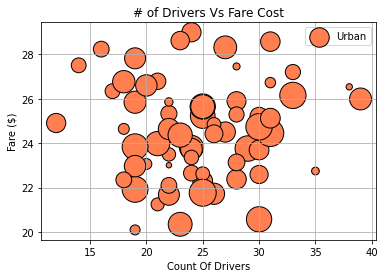

In [168]:
plt.scatter(urban_city_count, urban_city_mean, s= 10 *driver_mean_urban, label = "Urban", c ='coral', edgecolor = 'black')
plt.xlabel('Count Of Drivers')
plt.ylabel('Fare ($)')
plt.title('# of Drivers Vs Fare Cost')
plt.grid(True)
plt.legend()

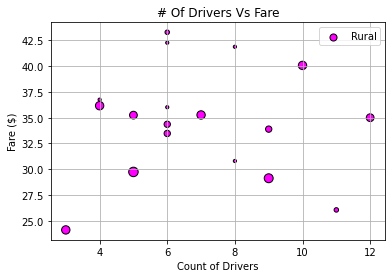

In [177]:
plt.scatter(rural_city_count, rural_city_mean, s= 10*driver_mean_rural, c = 'magenta', edgecolor = 'black', label = 'Rural')
plt.xlabel('Count of Drivers')
plt.ylabel('Fare ($)')
plt.title('# Of Drivers Vs Fare')
plt.grid(True)
plt.legend()

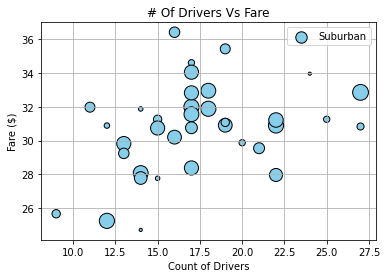

In [187]:
plt.scatter(suburban_city_count, suburban_city_mean, c ='skyblue', s = 10*driver_mean_suburban, edgecolor ='black', label = 'Suburban')
plt.xlabel('Count of Drivers')
plt.ylabel('Fare ($)')
plt.title('# Of Drivers Vs Fare')
plt.grid(True)
plt.legend()

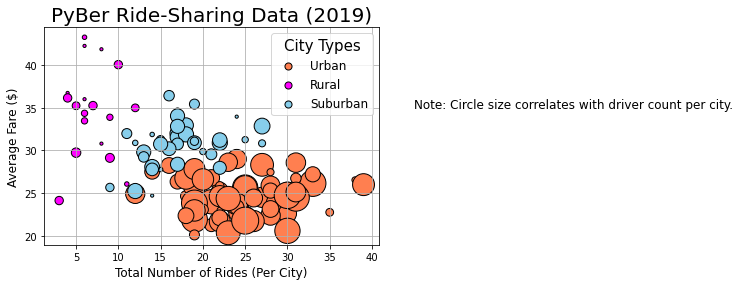

<Figure size 432x288 with 0 Axes>

In [212]:
plt.scatter(urban_city_count, urban_city_mean, s= 10 *driver_mean_urban, label = "Urban", c ='coral', edgecolor = 'black')
plt.scatter(rural_city_count, rural_city_mean, s= 10*driver_mean_rural, c = 'magenta', edgecolor = 'black', label = 'Rural')
plt.scatter(suburban_city_count, suburban_city_mean, c ='skyblue', s = 10*driver_mean_suburban, edgecolor ='black', label = 'Suburban')

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, title="City Types")

lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]
lgnd.get_title().set_fontsize(15)

# Incorporate a text label about circle size.
plt.text(45, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")


plt.show()

# Save the figure.
plt.savefig("Fig1.png")

# Summary Statistics

In [225]:
urban_cities.describe()
suburban_city_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [220]:
rural_city_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [222]:
round(urban_city_count.mean(),2), round(suburban_city_count.mean(),2), round(rural_city_count.mean(),2)

(24.62, 17.36, 6.94)

In [228]:
round(urban_city_count.median(),2), round(suburban_city_count.median(),2), round(rural_city_count.median(),2)

(24.0, 17.0, 6.0)

In [229]:
round(urban_city_count.mode(),2), round(suburban_city_count.mode(),2), round(rural_city_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

# Using Numpy

In [254]:
mean_urban_city =np.mean(urban_city_count)
median_urban_city = np.median(urban_city_count)
mode_urban_city = sts.mode(urban_city_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_city:.2f}.")
print(f'The median for the ride counts for the urban trip is {median_urban_city:.2f}.')
print(f'The mode for the ride counts for the urban trip is {mode_urban_city}.')


The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for the urban trip is 24.00.
The mode for the ride counts for the urban trip is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [258]:
mean_suburban_city_count = np.mean(suburban_city_count)
median_suburban_city = np.median(suburban_city_count)
mode_suburban_city = sts.mode(suburban_city_count)
print(f'The mean for the ride count for suburban trips is {mean_suburban_city_count:.2f}.')
print(f'The median for the ride count for the susburban trip is {median_suburban_city : .2f}.')
print(f'The mode for the ride count for the suburban trip is {mode_suburban_city}.')

The mean for the ride count for suburban trips is 17.36.
The median for the ride count for the susburban trip is  17.00.
The mode for the ride count for the suburban trip is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [259]:
mode_rural_city_count = sts.mode(rural_city_count)
print(f'The mode for the ride count for rural trips is { mode_rural_city_count:}.')

The mode for the ride count for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


# Summary Statistics

In [266]:
# Creating a df for fares only
urban_fares = urban_cities['fare']
rural_fares = rural_cities['fare']
suburban_fares = suburban_cities['fare']
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [262]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [265]:
print(np.mean(rural_fares)),print(np.mean(suburban_fares))


34.623440000000016
30.97012800000002


(None, None)

In [267]:
# Creating a df from drive count and finding the measure of central tendency

In [371]:
urban_drivers = urban_cities['driver_count']
rural_drivers = rural_cities['driver_count']
suburban_drivers = suburban_cities['driver_count']


In [271]:
urban_drivers_mean = np.mean(urban_drivers)
rural_drivers_mean = np.mean(rural_drivers)
suburban_drivers_mean = np.mean(suburban_drivers)

In [273]:
urban_drivers_median = np.median(urban_drivers)
rural_drivers_median = np.median(rural_drivers)
suburban_drivers_median = np.median(suburban_drivers)

In [282]:
urban_drivers_mode = sts.mode(urban_drivers)
rural_drivers_mode = sts.mode(rural_drivers)
suburban_drivers_mode = sts.mode(rural_drivers)

In [288]:
urban_stat_df = pd.DataFrame({
    'Mean': urban_drivers_mean,
    'Median': urban_drivers_median,
    'Mode': urban_drivers_mode
})
urban_stat_df

rural_stat_df = pd.DataFrame({
    'Mean': rural_drivers_mean,
    'Median': rural_drivers_median,
    'Mode': rural_drivers_mode
})
rural_stat_df

suburban_stat_df= pd.DataFrame({
    'Mean': suburban_drivers_mean,
    'Median': suburban_drivers_median,
    'Mode': suburban_drivers_mode
})
suburban_stat_df

,Mean,Median,Mode
0,13.712,16.0,[1]
1,13.712,16.0,[32]


# Box and Whisker plot

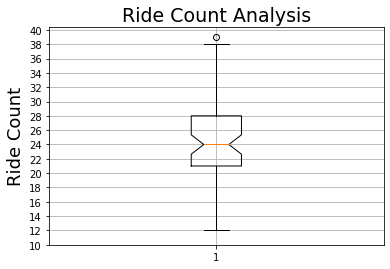

In [310]:
x_label = 'Urban'
fig, ax = plt.subplots()
ax.boxplot(urban_city_count, x_label)
plt.ylabel('Ride Count',size = 18)
plt.title('Ride Count Analysis', size = 19)

ax.set_yticks(np.arange(10, 41, step = 2.0 ))
plt.grid(True)
plt.show()

# 5.4.4 Creating Whisker Plots

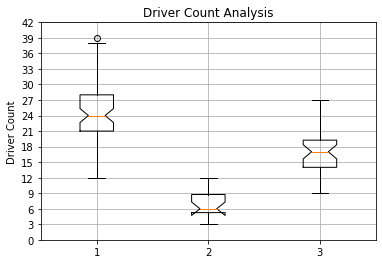

In [330]:
x_label = ['Urban','Rural', 'Suburban']
ride_count_data = [urban_city_count, rural_city_count, suburban_city_count]
fig, ax = plt.subplots()
ax.boxplot(ride_count_data, x_label)
ax.set_ylabel('Driver Count')
ax.set_title('Driver Count Analysis')
ax.set_yticks(np.arange(0, 45, step = 3.0))
plt.grid(True)

plt.savefig('Pyber1')
plt.show()


In [334]:
urban_city_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [336]:
urban_city_outlier = urban_city_count[urban_city_count == 39].index[0]
urban_city_outlier

'West Angela'

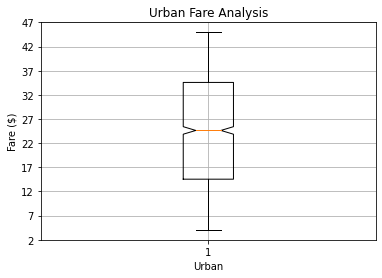

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [347]:
x_label = 'Urban'
fig, ax = plt.subplots()
ax.boxplot(urban_fares, x_label)
ax.set_xlabel('Urban')
ax.set_ylabel('Fare ($)')
ax.set_title('Urban Fare Analysis')
ax.set_yticks(np.arange(2,51, step = 5))
plt.grid()
plt.show()
print('Summary Statistics')
urban_fares.describe()

Summary Statistics
Urban:
 count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64
Rural:
 count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64
Suburban:
 count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64


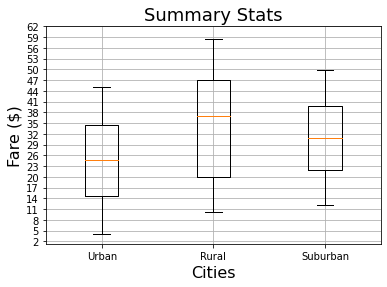

In [368]:
x_label = ['Urban', 'Rural', 'Suburban']
fare_analysis = [urban_fares, rural_fares, suburban_fares]
fig, ax = plt.subplots()
ax.boxplot(fare_analysis,labels = x_label)
ax.set_yticks(np.arange(2,65,step = 3))
ax.set_ylabel('Fare ($)', size = 16)
ax.set_xlabel('Cities', size = 16)
ax.set_title('Summary Stats', size = 18)
plt.grid()
print('Summary Statistics')
print('Urban:\n',
      urban_fares.describe())
print('Rural:\n',
      rural_fares.describe())
print('Suburban:\n',
      suburban_fares.describe())

plt.savefig('Pyber2')
plt.show()

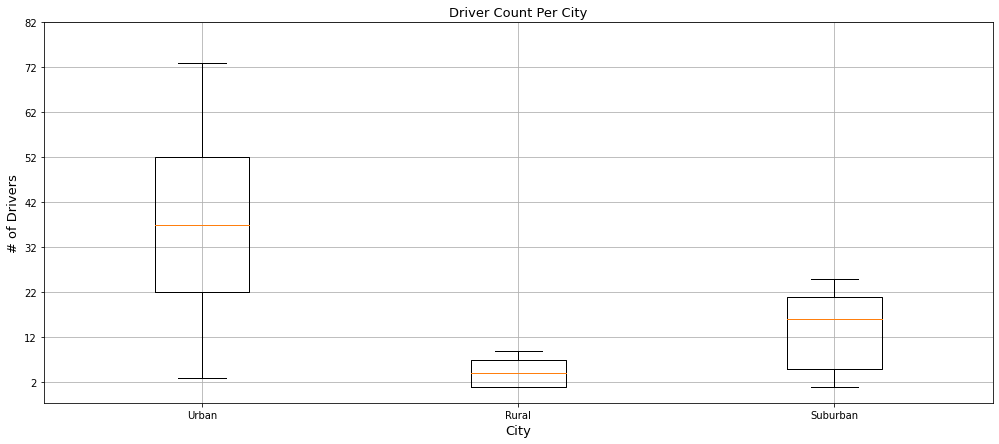

In [468]:
x_labels = ['Urban','Rural', 'Suburban']
fig, ax = plt.subplots(figsize = (17,7))
ax.boxplot([urban_drivers, rural_drivers, suburban_drivers], labels = x_labels)
ax.set_yticks(np.arange(2,85,step = 10))
ax.set_ylabel('# of Drivers', size = 13)
ax.set_xlabel('City', size = 13)
ax.grid()
ax.set_title('Driver Count Per City', size = 13)
plt.savefig('Whisker Driver')
plt.show()

In [394]:
# Filtering Types to Create Pie Chart


In [404]:
sum_fares_by_type = city_ride_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [406]:
total_fare = city_ride_data_df['fare'].sum()
total_fare

63538.64

In [409]:
percentages_fares = sum_fares_by_type / total_fare * 100
round(percentages_fares,2)

type
Rural        6.81
Suburban    30.46
Urban       62.72
Name: fare, dtype: float64

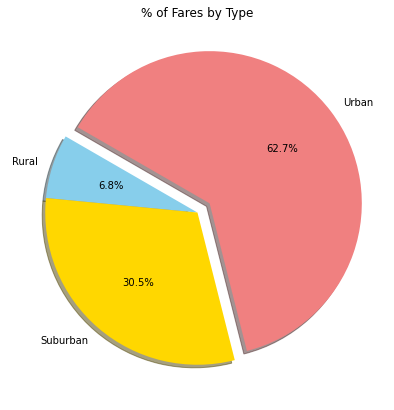

In [467]:
name = ['Rural', 'Suburban', 'Urban']
plt.subplots(figsize =(17,7))
plt.pie(percentages_fares, labels =  name, 
        colors = ['skyblue', 'gold', 'lightcoral']
        ,autopct = '%1.1f%%', startangle = 150,
        shadow = True,explode = [0,0,.1])
plt.title('% of Fares by Type')
plt.savefig('Piechartfares.png')
plt.show()

In [442]:
rides_by_city = city_ride_data_df.groupby(['type']).count()['ride_id']
total_rides = city_ride_data_df['ride_id'].count()

In [445]:
percentage_ride = rides_by_city / total_rides * 100
round(percentage_ride,2)

type
Rural        5.26
Suburban    26.32
Urban       68.42
Name: ride_id, dtype: float64

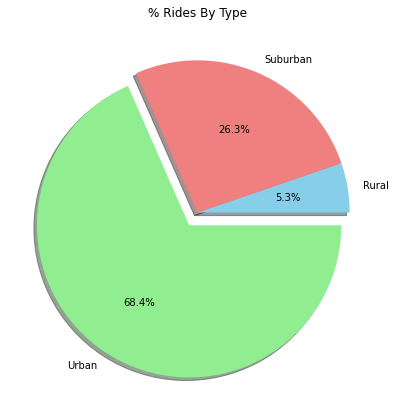

In [466]:
x_label = ['Rural','Suburban', 'Urban' ]
plt.subplots(figsize = (12,7))
plt.pie(percentage_ride, labels = x_label,
        colors = ['skyblue','lightcoral','lightgreen'],
        shadow = True,
        explode= [0,0,.1], autopct='%1.1f%%')
plt.title('% Rides By Type')
plt.savefig('%ridebytypes.png')
plt.show()

In [477]:
# Calculate the percentage of drivers for each city type.
count_type = city_ride_data_df.groupby(["type"]).sum()["driver_count"] 
sum_driver = city_ride_data_df["driver_count"].sum() 
driver_percentage = count_type / sum_driver *100
round(driver_percentage,1)

type
Rural        0.8
Suburban    12.5
Urban       86.7
Name: driver_count, dtype: float64

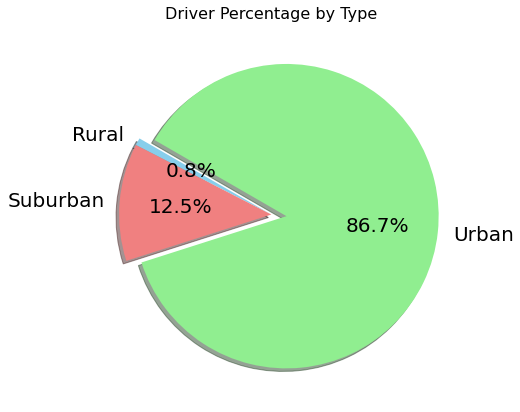

In [498]:
x_label = ['Rural','Suburban','Urban']
plt.subplots(figsize=(16,7))
plt.pie(driver_percentage, labels = x_label,
       colors = ['skyblue','lightcoral', 'lightgreen'],
       autopct = '%1.1f%%',
       explode = [0,0,.1],
       shadow = True,
       startangle = 150)
plt.rcParams['font.size'] = 20
plt.title('Driver Percentage by Type', size = 16)
plt.savefig('%driverpie.png')
plt.show()